In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from xgboost import XGBClassifier , plot_importance

In [41]:
data = pd.read_csv('../../data/raw/FC110595_thathsara/Healthcare-Diabetes.csv')

In [42]:
print(data.head)

<bound method NDFrame.head of         Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        1            6      148             72             35        0  33.6   
1        2            1       85             66             29        0  26.6   
2        3            8      183             64              0        0  23.3   
3        4            1       89             66             23       94  28.1   
4        5            0      137             40             35      168  43.1   
...    ...          ...      ...            ...            ...      ...   ...   
2763  2764            2       75             64             24       55  29.7   
2764  2765            8      179             72             42      130  32.7   
2765  2766            6       85             78              0        0  31.2   
2766  2767            0      129            110             46      130  67.1   
2767  2768            2       81             72             15       76  30.1  

In [43]:
print("\nBasic Info:")
print(data.info())


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB
None


In [44]:
print("\nStatistical Summary:")
print(data.describe())


Statistical Summary:
                Id  Pregnancies      Glucose  BloodPressure  SkinThickness  \
count  2768.000000  2768.000000  2768.000000    2768.000000    2768.000000   
mean   1384.500000     3.742775   121.102601      69.134393      20.824422   
std     799.197097     3.323801    32.036508      19.231438      16.059596   
min       1.000000     0.000000     0.000000       0.000000       0.000000   
25%     692.750000     1.000000    99.000000      62.000000       0.000000   
50%    1384.500000     3.000000   117.000000      72.000000      23.000000   
75%    2076.250000     6.000000   141.000000      80.000000      32.000000   
max    2768.000000    17.000000   199.000000     122.000000     110.000000   

           Insulin          BMI  DiabetesPedigreeFunction          Age  \
count  2768.000000  2768.000000               2768.000000  2768.000000   
mean     80.127890    32.137392                  0.471193    33.132225   
std     112.301933     8.076127                  0.32

In [45]:
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


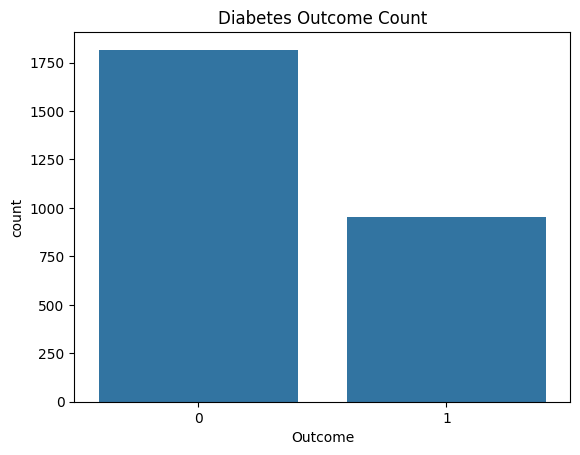

In [46]:
sns.countplot(x='Outcome',data=data)
plt.title('Diabetes Outcome Count')
plt.show()

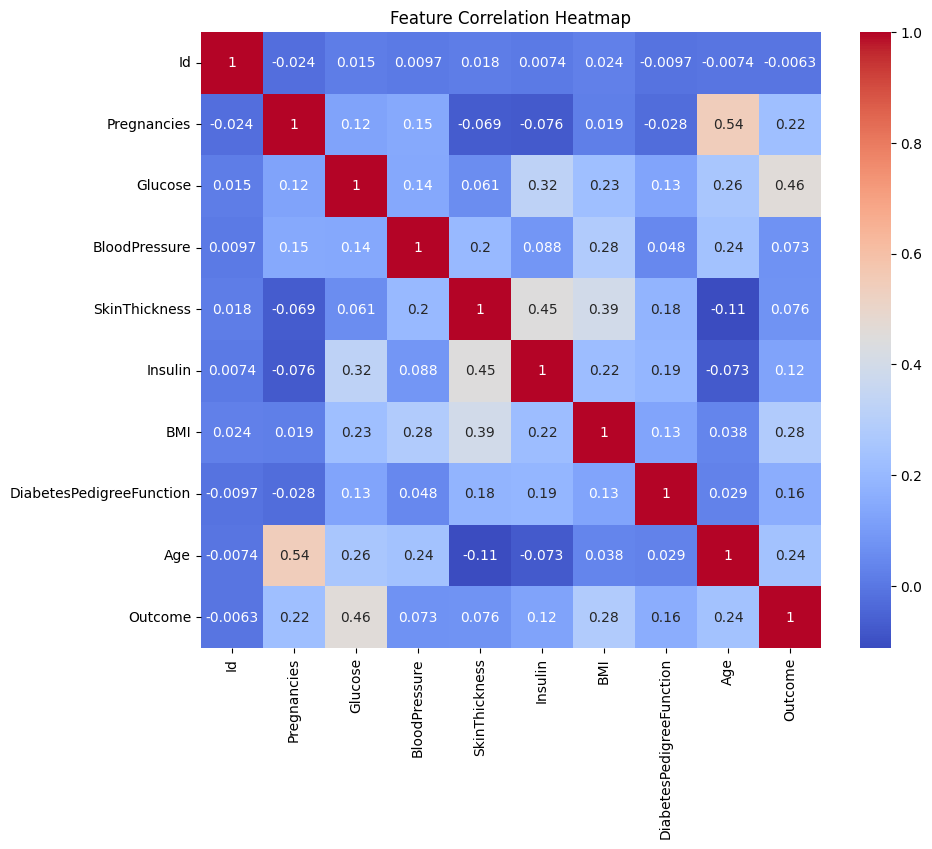

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [48]:
data.drop(columns=['Id'], inplace=True)

In [49]:
x = data.drop('Outcome', axis=1)
y = data['Outcome']

In [50]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42, stratify=y)